In [1]:
from psychrnn.tasks.task import Task
import numpy as np
import scipy.io

In [2]:
import pickle

In [3]:
tina_data = pickle.load(open("/home/kushalk/side_positions.pickle", "rb"))

In [4]:
tina_data = np.dstack(tina_data)[:2000, :, :100]

In [5]:
tina_data.shape

(2000, 2, 100)

In [6]:
outcomes = np.load("/home/kushalk/succ_fail.npy").astype(int)

In [7]:
outcomes

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1])

In [8]:
teena_succ = tina_data[:, :, outcomes == 1]

In [9]:
teena_succ.shape[2]

72

In [10]:
class Reach2Grab(Task):
    def __init__(self, dt, tau, T, N_batch):
        super(Reach2Grab, self).__init__(1, 2, dt, tau, T, N_batch)

    def generate_trial_params(self, batch, trial):
        """"Define parameters for each trial.

        Using a combination of randomness, presets, and task attributes, define the necessary trial parameters.

        Args:
            batch (int): The batch number that this trial is part of.
            trial (int): The trial number of the trial within the batch.

        Returns:
            dict: Dictionary of trial parameters.

        """

        # ----------------------------------
        # Define parameters of a trial
        # ----------------------------------
        params = dict()
        params["trial_ix"] = np.random.randint(0, teena_succ.shape[2])

        return params

    def trial_function(self, time, params):
        """ Compute the trial properties at the given time.

        Based on the params compute the trial stimulus (x_t), correct output (y_t), and mask (mask_t) at the given time.

        Args:
            time (int): The time within the trial (0 <= time < T).
            params (dict): The trial params produced generate_trial_params()

        Returns:
            tuple:

            x_t (ndarray(dtype=float, shape=(N_in,))): Trial input at time given params.
            y_t (ndarray(dtype=float, shape=(N_out,))): Correct trial output at time given params.
            mask_t (ndarray(dtype=bool, shape=(N_out,))): True if the network should train to match the y_t, False if the network should ignore y_t when training.

        """
        # x_t = params['direction']
        x_t = 1
        
        # always true because we want the network to train to y_t
        
        y_t = teena_succ[time, :, params["trial_ix"]]
        
        mask_t = np.ones(shape=y_t.shape, dtype=bool)
        
        # trajectory that matches direction 
        
        # y_t returns a trajectory

        return x_t, y_t, mask_t

In [21]:
model.destruct()

In [ ]:
from matplotlib import pyplot as plt

from psychrnn.backend.models.basic import Basic

# ---------------------- Set up a basic model ---------------------------
task = Reach2Grab(dt = 2, tau = 10, T = 2000, N_batch = 128)
network_params = task.get_task_params() # get the params passed in and defined in pd
network_params['name'] = 'model' # name the model uniquely if running mult models in uniso
network_params['N_rec'] = 100 # set the number of recurrent units in the model
model = Basic(network_params) # instantiate a basic vanilla RNN

# ---------------------- Train a basic model ---------------------------
train_params = {
    "training_iters": 250
}
model.train(task, train_params) # train model to perform pd task

# ---------------------- Test the trained model ---------------------------
x,target_output,mask, trial_params = task.get_trial_batch() # get pd task inputs and outputs
model_output, model_state = model.test(x) # run the model on input x

# ---------------------- Plot the results ---------------------------


# ---------------------- Teardown the model -------------------------


2022-11-14 17:56:34.417015: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-14 17:56:34.417332: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-14 17:56:34.417545: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-14 17:56:34.417791: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-14 17:56:34.417996: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from S

In [ ]:
model_output.shape

In [19]:
model_output[0].shape

(400, 2)

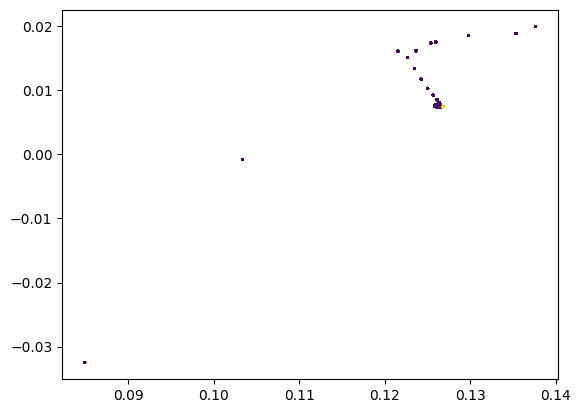

In [20]:
for i in range(128):
    plt.scatter(model_output[i][:, 0], model_output[i][:, 1], s=1, c=np.arange(model_output.shape[1]))

In [ ]:
model.destruct()